# Analyzing Mental Health During the First Three Months of the COVID-19 Lockdown
#### By Roz Gillie

## Introduction
I am interested in looking at the effect COVID-19 had on the general mental health of the United states population. I am specifically interested in the first three months of COVID, when everyone was fairly isolated and in general everyone stayed home. These three months were a time of change for a large population of people, as some lost jobs and many lost connections to friends and family. This lockdown I beleive put a lot of stressors on American people, while also giving them the space and isolation to possibly analyze their own mental health more. I think it will be interesting to look at these initial three months and see trends in mental health also regarding specific demographics, and to see if any group was disproportionately affected. 

## Background and Related Work
There is a thorough amount of research that has covered the effect COVID-19 has had on people’s mental health. One study I looked into compared mental health trends of January in 2021, to the same trends in January of 2019 (https://www.kff.org/coronavirus-covid-19/issue-brief/the-implications-of-covid-19-for-mental-health-and-substance-use/#:~:text=During%20the%20COVID%2D19%20pandemic,largely%20stable%20since%20spring%202020.) This study looked much later into the pandemic than I plan to, but has interesting takeaways that discuss how symptoms of anxiety and depression rose due to the pandemic. Based on my survey data, I plan to do a data analysis similar to this article, but that focuses solely on the first three months of the pandemic. 

There is also this study done but the CDC that came out in August of 2020 (https://www.cdc.gov/mmwr/volumes/69/wr/mm6932a1.htm), which looks at the self-reports of adults mental health in June 2020. They also looked at how mental health trends affected people as broken down by different demographics, and how mental health rates tie into rising rates of substance abuse and suicide. This study was also done using survey data, and recognizies it as one of it's limitations since the data is self-reported. This is also a limiation I must acknowledge in my work, as the data I am using also was not collected by professionals. Overall, substantial research has been done into how people’s mental health has been affected during the pandemic as whole, and in my research I hope to dial into the very beginning of lockdown specifically.

## Research Questions and Hypotheses
I originally wanted to look at the affect COVID-19 had on Americans, but because I did not have survey data from before the pandemic, I chose to instead focus on the first three months of the COVID-19 lockdown. The dataset I have is survey data that was collected in the United States, and so I am limiting my question to be about Americans specifically.

**Research Questions: What was the effect of COVID-19 on the mental health of Americans during the first three months of the pandemic? How were specific demographics in the U.S. affected?**

Hypothesis: Based on my prior research, I expect there to be a trend upwards of metal health reports over the three months, and for minoritiy groups and lower income groups to be diproprtionatly affected.

## Methodology

Import necessary Python libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as scipy
from scipy import stats
import seaborn as sns

from pytrends.request import TrendReq
pytrend = TrendReq()

In [86]:
# Friend Aman's code to show smooth line
def smooth(y):
#     box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, np.ones(168), mode='same')/168
    return y_smooth

### Initial Data Exploration

To begin exploring my topic, I used the pytrends library to create some visualizations of what the trends of certain search terms looked like during 2020. I began by looking at the term "coronavirus anxiety", to see how the trends of anxiety related to coronavirus progressed. For this exploration, I think it’s important to point out that the scores used by Google to measure search trends are based on a scale of 1-100, representing the proportion of that term to all searches on all topics. That means that we need to take into account major U.S events that would distort this proportion, such as the Black Lives Matter movement in June 2020, west coast wildfires in mid August, death of Ruth Bader Ginsburg, and the many other things that happened in the year 2020. 

The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The requ

ZeroDivisionError: integer division or modulo by zero

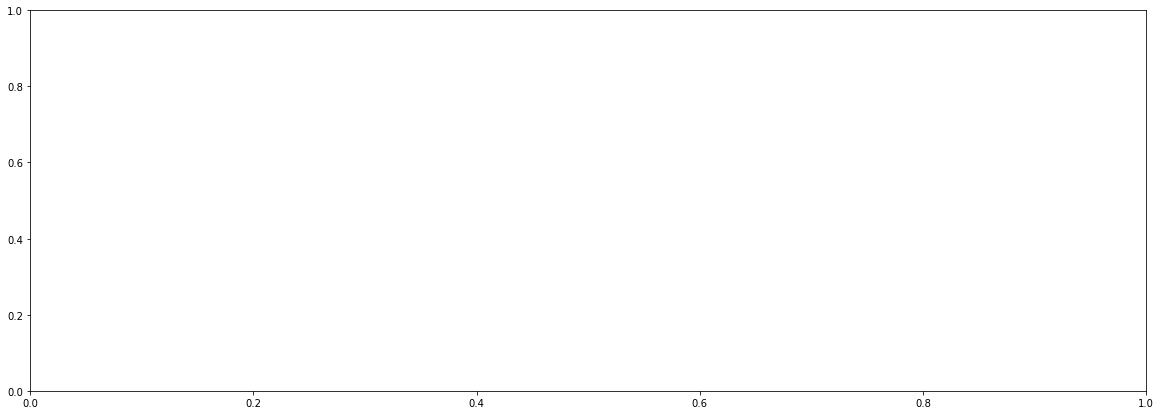

In [89]:
# size of plot
plt.figure(figsize=(20, 7))

# keyword term
kw_list = ['coronavirus anxiety']

# pytrend call of keyword, beginning January 1st 2020 and ending May 31st, 2020
interest = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=1, day_start=1, hour_start=1, year_end=2020, month_end=5, day_end=31, hour_end=23, cat=0, geo='US', gprop='', sleep=0) 

# plot of interest in anxiety coronavirus, with smoothing function applied to create a smooth line
Anxiety_Coronavirus = plt.plot(interest)
plt.plot(interest.apply(smooth, axis=0))

# plot labels
plt.title("Google Search Trends of Term ''Coronavirus Anxiety''")
plt.xlabel("Date")
plt.ylabel("Search Frequency Proportion")


The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The requ

ZeroDivisionError: integer division or modulo by zero

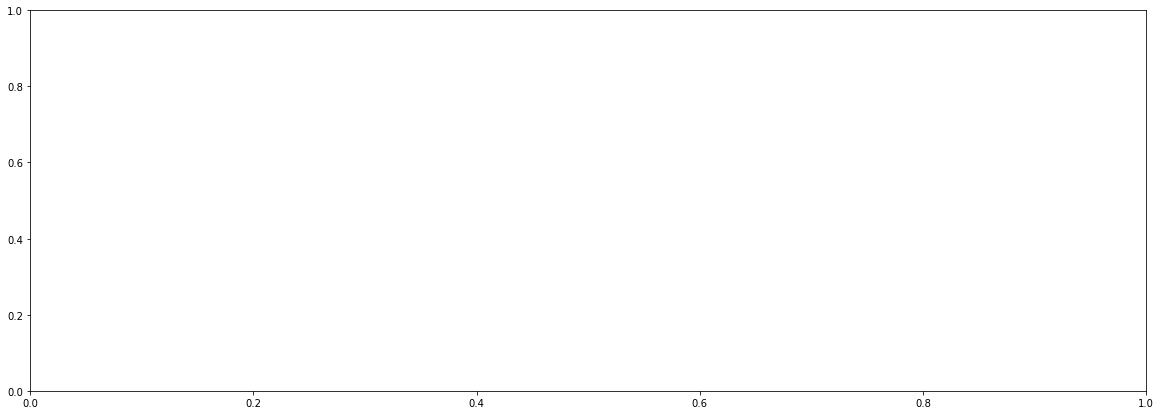

In [72]:
### Google search trends of anxiety and depression

# plot size
plt.figure(figsize=(20, 7))

# mental health term list
kw_list_mh = ['anxiety', 'depression']

# function that loops through search terms and stacks plots on top of one another. Covers the entire year of 2020.
interest = pytrend.get_historical_interest(kw_list_mh, year_start=2020, month_start=1, day_start=1, hour_start=1, year_end=2020, month_end=12, day_end=31, hour_end=23, geo='US', gprop='', sleep=0) 
mh_plot = plt.plot(interest.apply(smooth, axis=0))
plt.title("Google Search Trends of ''Anxiety'' and ''Depression''")
plt.xlabel("Date")
plt.ylabel("Search Frequency Proportion")


In [57]:
### Google search trends of people's search for therapy and psychiatrists

# plot size
plt.figure(figsize=(20, 7))

# therapy term list
therapy_list = ['therapy', "psychiatrist"]

# function that loops through search terms and stacks plots on top of one another
=interest = pytrend.get_historical_interest(therapy_list, year_start=2020, month_start=1, day_start=1, hour_start=1, year_end=2020, month_end=8, day_end=31, hour_end=23, geo='US', gprop='', sleep=0) 
Therapy_Search_Trends = plt.plot(interest.apply(smooth, axis=0))
plt.title("Google Search Trends for ''Therapy'' and ''Psychiatrists'' from January 2020 - August 2020")
plt.xlabel("Date")
plt.ylabel("Search Frequency Proportion")


SyntaxError: invalid syntax (1128447594.py, line 10)

## Survey Data Analysis Preparation

After exploring google search trends, I then got into the true analysis of the data. For this section I used the survey data that had three dataframes; one for April, one for May, and one for June of 2020. Each dataframe has 178 columns and roughly 8,700 rows. To help my computer handle this data quickly, and to perform my data analysis, I needed to first clean up the dataframes and add columns that would be useful in comparing means of data.

In [5]:
# read in april dataframe
df1 = pd.read_csv("April_Survey.csv",  
                engine='python',encoding='utf-8', error_bad_lines=False)
df1['MONTH'] = "April"

# read in may dataframe
df2 = pd.read_csv("May_Survey.csv", 
                engine='python',encoding='utf-8', error_bad_lines=False)
df2['MONTH'] = "May"

# read in june dataframe
df3 = pd.read_csv("June_Survey.csv", 
                engine='python',encoding='utf-8', error_bad_lines=False)
df3['MONTH'] = "June"

# concat to one big data frame
data = pd.concat([df1, df2, df3], axis=0)

# choose only necessary columns
d = data[["INC_BANNER", "RACE1_BANNER", "MONTH", "GENDER", "SOC5A", "SOC5B", "SOC5C", "SOC5D", "SOC5E"]]


/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 5949: unexpected end of data
Skipping line 3788: unexpected end of data


To analyze the mental health data of survey takers, I am looking at the columns SOC5A, SOC5B, SOC5C, SOC5D, SOC5E. These correspond to the answers for this question from the survey:

In the past 7 days, how often have you…

RANDOMIZE GRID ITEMS:
1. (A) Felt nervous, anxious, or on edge
2. (B) Felt depressed
3. (C) Felt lonely
4. (D) Felt hopeless about the future
5. (E) [ANCHOR] Had physical reactions such as sweating, trouble breathing, nausea or a pounding heart when thinking about your experience with the coronavirus pandemic

RESPONSE OPTIONS:
1. Not at all or less than 1 day
2. 1-2 days
3. 3-4 days
4. 5-7 days

To allow me to work with a single datapoint that represented a "mental health score", I then added a column to the datasets that represented the total frequency of mental health days, or days they experienced one of the grid items above, and added them together into a single score. Because the frequency scores didn't have a zero, I compensated for that by subtracting 5 from the total score. 

In [6]:
d['SOC5A_num']=d['SOC5A'].str[1:2] 
d['SOC5B_num']=d['SOC5B'].str[1:2]
d['SOC5C_num']=d['SOC5C'].str[1:2]
d['SOC5D_num']=d['SOC5D'].str[1:2]
d['SOC5E_num']=d['SOC5E'].str[1:2]

d['sum'] = (pd.to_numeric(d['SOC5A_num']) + pd.to_numeric(d['SOC5B_num']) + pd.to_numeric(d['SOC5C_num']) + pd.to_numeric(d['SOC5D_num']) + pd.to_numeric(d['SOC5E_num'])) - 5


/tmp/ipykernel_171/1143135458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['SOC5A_num']=d['SOC5A'].str[1:2]
/tmp/ipykernel_171/1143135458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['SOC5B_num']=d['SOC5B'].str[1:2]
/tmp/ipykernel_171/1143135458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [7]:
# pull out score for each response to mental health questions in dataframe 1 and assign to new column
df1['SOC5A_num']=df1['SOC5A'].str[1:2] 
df1['SOC5B_num']=df1['SOC5B'].str[1:2]
df1['SOC5C_num']=df1['SOC5C'].str[1:2]
df1['SOC5D_num']=df1['SOC5D'].str[1:2]
df1['SOC5E_num']=df1['SOC5E'].str[1:2]

# pull out score for each response to mental health questions in dataframe 2 and assign to new column
df2['SOC5A_num']=df2['SOC5A'].str[1:2]
df2['SOC5B_num']=df2['SOC5B'].str[1:2]
df2['SOC5C_num']=df2['SOC5C'].str[1:2]
df2['SOC5D_num']=df2['SOC5D'].str[1:2]
df2['SOC5E_num']=df2['SOC5E'].str[1:2]

# pull out score for each response to mental health questions in dataframe 3 and assign to new column
df3['SOC5A_num']=df3['SOC5A'].str[1:2]
df3['SOC5B_num']=df3['SOC5B'].str[1:2]
df3['SOC5C_num']=df3['SOC5C'].str[1:2]
df3['SOC5D_num']=df3['SOC5D'].str[1:2]
df3['SOC5E_num']=df3['SOC5E'].str[1:2]

# Create 'sum' column, adds up frequency reported for each grid item of mental health survey question
# Subtracts 5 to accomodate the fact that the question scale begins at 1 instead of 0
df1['sum'] = (pd.to_numeric(df1['SOC5A_num']) + pd.to_numeric(df1['SOC5B_num']) + pd.to_numeric(df1['SOC5C_num']) + pd.to_numeric(df1['SOC5D_num']) + pd.to_numeric(df1['SOC5E_num'])) - 5
df2['sum'] = (pd.to_numeric(df2['SOC5A_num']) + pd.to_numeric(df2['SOC5B_num']) + pd.to_numeric(df2['SOC5C_num']) + pd.to_numeric(df2['SOC5D_num']) + pd.to_numeric(df2['SOC5E_num'])) - 5
df3['sum'] = (pd.to_numeric(df3['SOC5A_num']) + pd.to_numeric(df3['SOC5B_num']) + pd.to_numeric(df3['SOC5C_num']) + pd.to_numeric(df3['SOC5D_num']) + pd.to_numeric(df3['SOC5E_num'])) - 5



## Data analysis

### Looking at the data as a whole

To begin my data analysis, I wanted to see if there were significant trends when you compared the mental health scores between April, May, and June of all survey takers. To conduct this analysis, I created numpy arrays of the mental health score (or 'sum' column) and ran a one-way ANOVA test on them. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [76]:
# numpy arrays of sum column for each dataframe
apr = np.array(df1['sum'])
may = np.array(df2['sum'])
june = np.array(df3['sum'])

In [77]:
# ANOVA test of all mental health scores
scipy.stats.f_oneway(apr, may, june)

F_onewayResult(statistic=1.977632225213945, pvalue=0.13843924319100234)

To create a visual element, I then used a distribution plot to see if there were any visible variations across the three datasets.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Mental Health Score', ylabel='Density'>

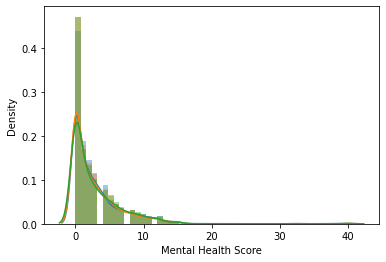

In [83]:
# stack distribution plot for each month's dataset
x = pd.Series(apr, name="Mental Health Score")
ax = sns.distplot(x)
sns.distplot(may,kde=True)
sns.distplot(june,kde=True)



### Looking at the data in regards to ethnic group

After looking at the data as a whole, I then decided to see if there were any trends when broken down and grouped by ethnic group. To do this analysis, I first had to create a list of the ethnic groups recorded in the survey. Then using this list, I iterated through each data frame to create a list of lists that grouped the mental health scores into each ethnic group category. I then assigned each list for a specific ethnic group to a variable so I could look at trends indiviudally. Finally, ran ANOVA tests on each ethnic group.

In [19]:
# create list of all unique ethnic groups reported in survey
race_list = list(d['RACE1_BANNER'].unique())

# create list of mental health scores, within a list of ethnic groups for the month of April
apr_list = []
for item in race_list:
    sum_list = list(df1['sum'][df1['RACE1_BANNER']==item])
    apr_list.append(sum_list)
    
# create list of mental health scores, within a list of ethnic groups for the month of May
may_list = []
for item in race_list:
    sum_list = list(df2['sum'][df2['RACE1_BANNER']==item])
    may_list.append(sum_list)
    
# create list of mental health scores, within a list of ethnic groups for the month of June
june_list = []
for item in race_list:
    sum_list = list(df3['sum'][df3['RACE1_BANNER']==item])
    june_list.append(sum_list)
    

In [20]:
# assigns each list of mental health scores for each ethnic group to a variable

apr0 = apr_list[0] ## white
# apr1 = apr_list[1] -- commented out unnecessary data points
apr2 = apr_list[2] ## black
apr3 = apr_list[3] ## hispanic
apr4 = apr_list[4] ## asian
apr5 = apr_list[5] ## other
# apr6 = apr_list[6] -- commented out unnecessary data points
# apr7 = apr_list[7] -- commented out unnecessary data points

may0 = may_list[0] ## white
# may1 = may_list[1] -- commented out unnecessary data points
may2 = may_list[2] ## black
may3 = may_list[3] ## hispanic
may4 = may_list[4] ## asian
may5 = may_list[5] ## other
# may6 = may_list[6] -- commented out unnecessary data points
# may7 = may_list[7] -- commented out unnecessary data points

june0 = june_list[0] ## white
# june1 = june_list[1] -- commented out unnecessary data points
june2 = june_list[2] ## black
june3 = june_list[3] ## hispanic
june4 = june_list[4] ## asian
june5 = june_list[5] ## other
## june6 = june_list[6] -- commented out unnecessary data points
## june7 = june_list[7] -- commented out unnecessary data points

### ANOVA test on each group

#### White

In [23]:
# ANOVA test on all white respondents
scipy.stats.f_oneway(apr0, may0, june0)

F_onewayResult(statistic=1.614877272880607, pvalue=0.19898003003888023)

#### Black

In [24]:
# ANOVA test on all black respondents
scipy.stats.f_oneway(apr2, may2, june2)

F_onewayResult(statistic=0.24440243359781427, pvalue=0.783217713267143)

#### Hispanic

In [25]:
# ANOVA test on all hispanic respondents
scipy.stats.f_oneway(apr3, may3, june3)

F_onewayResult(statistic=0.6031018561463642, pvalue=0.5473583436858237)

#### Asian

In [26]:
# ANOVA test on all Asian respondents
scipy.stats.f_oneway(apr4, may4, june4)

F_onewayResult(statistic=1.2647009905287232, pvalue=0.28345012518200297)

#### Other

In [27]:
# ANOVA test on all respondents who identified as a different ethnic group
scipy.stats.f_oneway(apr5, may5, june5)

F_onewayResult(statistic=0.6360549803050011, pvalue=0.5298751870553702)

After looking at each ethnic group individually, I then wanted to see if there was a relationship between the groups as a whole. To do this, I had to combine mental health score lists for each ethnic group so that I could run an ANOVA test on all of them at once. 

In [17]:
# added up scores for each group into one large list
race0 = apr0 + may0 + june0
race2 = apr2 + may2 + june2
race3 = apr3 + may3 + june3
race4 = apr4 + may4 + june4
race5 = apr5 + may5 + june5

In [18]:
# ANOVA test comparing mental health reports of all ethnic groups
scipy.stats.f_oneway(race0, race2, race3, race4, race5)

F_onewayResult(statistic=9.568409046084888, pvalue=1.0147909112331766e-07)

I then wanted to create a visual to show means of mental health scores across the three months as broken down by ethnic group. To do this, I looped through the mean of each ethnic group, for each month, and plotted it onto a matplot chart. 

In [67]:
# loops through list of mental health scores for each group in April, and finds mean of each one
april = [apr0,apr2,apr3,apr4,apr5]
mean_listApr = [np.mean(month) for month in april]

# loops through list of mental health scores for each group in May, and finds mean of each one
may = [may0,may2,may3,may4,may5]
mean_listMay = [np.mean(month) for month in may]

# loops through list of mental health scores for each group in June, and finds mean of each one
june = [june0,june2,june3,june4,june5]
mean_listJune = [np.mean(month) for month in june]

months = [0, 1, 2]

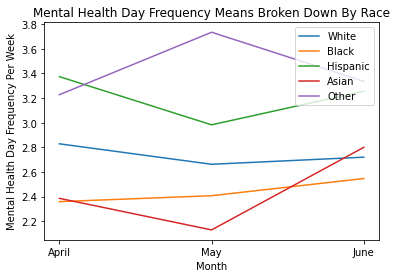

In [68]:
month_names = ["April", "May", "June"]
# plots means of mental health scores over time and grouped by ethnicity
plt.plot(months, [mean_listApr, mean_listMay, mean_listJune])
plt.title("Mental Health Day Frequency Means Broken Down By Race")
plt.xlabel("Month")
plt.ylabel("Mental Health Day Frequency Per Week")
plt.xticks(months, month_names)
plt.legend(["White","Black","Hispanic","Asian","Other"], loc=1)


## Income Breakdown

For my next step of analysis, I repeated the steps I did above with the ethnic groups, but this time looking at the different brackets of income as reported by survey takers.

In [22]:
# create list of unique incomes as reported on survey
income_list = list(d['INC_BANNER'].unique())

In [23]:
# create list of mental health scores, within a list of reported incomes for the month of April
inc_apr_list = []
for item in income_list:
    sum_list = list(df1['sum'][df1['INC_BANNER']==item])
    inc_apr_list.append(sum_list)

# create list of mental health scores, within a list of reported incomes for the month of May
inc_may_list = []
for item in income_list:
    sum_list = list(df2['sum'][df2['INC_BANNER']==item])
    inc_may_list.append(sum_list)

# create list of mental health scores, within a list of reported incomes for the month of June
inc_june_list = []
for item in income_list:
    sum_list = list(df3['sum'][df3['INC_BANNER']==item])
    inc_june_list.append(sum_list)
    

In [24]:
# assigns each list of mental health scores for each income bracket to a variable

inc_apr0 = inc_apr_list[0] ## less than 30k
inc_apr1 = inc_apr_list[1] ## more than 125k
inc_apr2 = inc_apr_list[2] ## 60k to 125k
inc_apr3 = inc_apr_list[3] ## 30k to 60k

inc_may0 = inc_may_list[0] ## less than 30k
inc_may1 = inc_may_list[1] ## more than 125k
inc_may2 = inc_may_list[2] ## 60k to 125k
inc_may3 = inc_may_list[3] ## 30k to 60k

inc_june0 = inc_june_list[0] ## less than 30k
inc_june1 = inc_june_list[1] ## more than 125k
inc_june2 = inc_june_list[2] ## 60k to 125k
inc_june3 = inc_june_list[3] ## 30k to 60k

In [25]:
# added up scores for each group into one large list
inc0 = inc_apr0 + inc_may0 +inc_june0
inc1 = inc_apr1 + inc_may1 +inc_june1
inc2 = inc_apr2 + inc_may2 +inc_june2
inc3 = inc_apr3 + inc_may3 +inc_june3

In [46]:
# ANOVA test to compare each income bracket over the three months
scipy.stats.f_oneway(inc0, inc1, inc2, inc3)

F_onewayResult(statistic=50.90679524018242, pvalue=1.0873741437512506e-32)

In [70]:
# loops through list of mental health scores for each group in April, and finds mean of each one
inc_april = [inc_apr0,inc_apr1,inc_apr2,inc_apr3]
inc_mean_listApr = [np.mean(month) for month in inc_april]

# loops through list of mental health scores for each group in May, and finds mean of each one
inc_may = [inc_may0,inc_may1,inc_may2,inc_may3]
inc_mean_listMay = [np.mean(month) for month in inc_may]

# loops through list of mental health scores for each group in June, and finds mean of each one
inc_june = [inc_june0,inc_june1,inc_june2,inc_june3]
inc_mean_listJune = [np.mean(month) for month in inc_june]


['(1) Less than $30,000', '(4) More than $125k', '(3) $60k to less than $125k', '(2) $30k to less than $60k', nan, None]


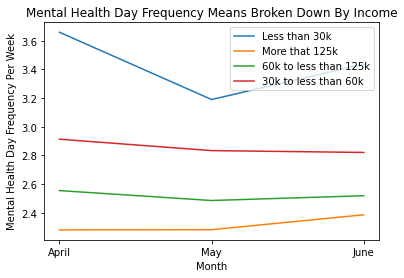

In [71]:
# plots means of mental health scores over time and grouped by income bracket
plt.plot(months, [inc_mean_listApr, inc_mean_listMay, inc_mean_listJune])
plt.title("Mental Health Day Frequency Means Broken Down By Income")
plt.xlabel("Month")
plt.ylabel("Mental Health Day Frequency Per Week")
plt.xticks(months, month_names)
plt.legend(["Less than 30k","More that 125k","60k to less than 125k","30k to less than 60k"], loc=1)

### ANOVA test on each income group

#### Less than $30,000

In [26]:
scipy.stats.f_oneway(inc_apr0, inc_may0, inc_june0)
print(income_list)

['(1) Less than $30,000', '(4) More than $125k', '(3) $60k to less than $125k', '(2) $30k to less than $60k', nan, None]


#### 30k to less than 60k

In [ ]:
scipy.stats.f_oneway(inc_apr3, inc_may3, inc_june3)

F_onewayResult(statistic=0.188612302127244, pvalue=0.8281176331872637)

#### 60k to less than 125k

In [ ]:
scipy.stats.f_oneway(inc_apr2, inc_may2, inc_june2)

F_onewayResult(statistic=0.1733441441390946, pvalue=0.8408539947133205)

#### More than 125k

In [51]:
scipy.stats.f_oneway(inc_apr1, inc_may1, inc_june1)

F_onewayResult(statistic=0.22472525045681221, pvalue=0.7987518910044002)

# Findings

### Google Trend Exploration
The google search trend data exploration showed how people continued to search out mental health help, even once quarantine began. It also showed how the trends of “coronavirus anxiety” spiked in mid march when the lockdown began, then slowly decreased as 2020 went on. 

### Data analysis in general
The ANOVA test of metal health scores across the three months proved to not have statistical significance. This is reflected also in the distribution plot of the three datasets, as there are no visual differences between the densities. 

### Data analysis of ethnic groups
When looking at each ethnic group individually, no relationship across the three months was shown to be statistically significant. When I ran a ANOVA test on the groups as a whole, there was a statistically significant difference between the mental health scores across ethnic groups.

### Data analysis of income
When I ran ANOVA tests on each income bracket individually, none of the brackets proved to have a statistically significant relationships across the three months. When I compared the mean mental health scores of each income bracket, there was a statistically significant difference.

# Discussion and Limitations
Based on my data analysis, I could not find any statistically significant difference regarding American's reported mental health across the first three months of the COVID-19 lockdown. This I believe could be due to the short period of time that I was looking at, and possibly a lack of data in each category. On the other hand, I was able to find significance regarding mental health scores across both ethnic groups and income brackets. This significant difference you can see when you look at the visualizations, as there is a wide gap between the average days of stress and anxiety experienced by someone making more than 125k, and someone making less than 30k. 

To me this makes sense, as those who are lower income or who are a discriminated against minoirty group face have many stressors in their life that may put a strain on their mental health. In addition, this stress can often go untreated as they cannot afford treatment or do not have the resources to get help. Mental healthcare is not accessible to everyone in America, so it makes sense to see a significant difference between privileged/non-privileged demographics. 



# Conclusion
Analyzing the survey data informed me that while there are no trends in the data for the first three months of the COVID-19 lockdown, there are significant differences between the mental health of different ethnic groups and income brackets. The Google search trend exploration showed me that while there is no significant rise in reports of mental health disorders, people are still actively searching for mental health terms on Google. If I could do this project again I think I would like to actually see how mental health trends in America have changed over the years in regards to the pandemic, and possibly compare data from the late 2010s to reports in 2020-2022. I think I limited myself by choosing this survey dataset, but nontheless I had interesting findings regarding the differences in mental health across demographics.